In [ ]:
!pip install avalanche-lib

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.2/134.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 971.9/971.9 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.2/585.2 kB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 866.2/866.2 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.1/309.1 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 32.3 MB/s eta 0:00:00
 

In [ ]:
pip install pytorchcv==0.0.67

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.4/532.4 kB 22.8 MB/s eta 0:00:00
  Attempting uninstall: pytorchcv
    Found existing installation: pytorchcv 0.0.71
    Uninstalling pytorchcv-0.0.71:
      Successfully uninstalled pytorchcv-0.0.71


In [ ]:
#from avalanche.benchmarks.datasets import MNIST
import numpy as np
import pandas as pd
import torch
from torch import nn
import torch.nn as nn
from torch.nn import Module, Linear
from torch.optim import SGD
from torchvision import transforms
import pytorchcv
import matplotlib.pyplot as plt
from avalanche.benchmarks.classic import SplitMNIST, PermutedMNIST, SplitCIFAR10
from avalanche.benchmarks.datasets import CIFAR10
from avalanche.benchmarks import nc_benchmark, ni_benchmark
from torchvision import transforms, models
from torchvision.models import resnet50, ResNet50_Weights, mobilenet_v2, MobileNet_V2_Weights
from avalanche.models import SimpleMLP, IcarlNet
import torchvision.models as models
from avalanche.training.plugins import EWCPlugin
from avalanche.training import Naive, EWC, ICaRL
from avalanche.training.plugins import EvaluationPlugin
from avalanche.logging import InteractiveLogger
from avalanche.evaluation.metrics import accuracy_metrics, Accuracy, forgetting_metrics, bwt_metrics, forward_transfer_metrics, confusion_matrix_metrics
from avalanche.evaluation import PluginMetric
from avalanche.evaluation.metrics import Accuracy
from avalanche.evaluation.metric_results import MetricValue
from avalanche.evaluation.metric_utils import get_metric_name



#AMAZON
import re
import string
import collections

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, SnowballStemmer

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
benchmark = SplitMNIST(n_experiences=5, return_task_id=False)

class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(256, 256)

    def forward(self, x):
        x = x.view(x.size(0), -1)  #Aplanar las imágenes
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

class Classifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Classifier, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.fc(x)

feature_extractor = FeatureExtractor()
classifier = Classifier(input_size=256, num_classes=benchmark.n_classes)

optimizer = SGD(
    list(feature_extractor.parameters()) + list(classifier.parameters()),
    lr=2e-2, momentum=0.9, weight_decay=1e-5
)

interactive_logger = InteractiveLogger()
evaluation_plugin = EvaluationPlugin(
    accuracy_metrics(minibatch=True, epoch=True, experience=True, stream=True),
    forgetting_metrics(experience=True, stream=True),
    loggers=[interactive_logger]
)

cl_strategy = ICaRL(
    feature_extractor=feature_extractor,
    classifier=classifier,
    optimizer=optimizer,
    memory_size=2000,  #Tamaño de la memoria para almacenar ejemplos de clases antiguas
    buffer_transform=None,
    fixed_memory=True,
    train_mb_size=128,
    train_epochs=4,
    eval_mb_size=128,
    evaluator=evaluation_plugin
)

for experience in benchmark.train_stream:
    print(f"Entrenando en la experiencia {experience.current_experience}")
    cl_strategy.train(experience)
    print("Evaluando en el conjunto de prueba:")
    cl_strategy.eval(benchmark.test_stream)

Failed to download (trying next):
HTTP Error 403: Forbidden




100%|██████████| 9912422/9912422 [00:00<00:00, 16655847.89it/s]


Extracting /root/.avalanche/data/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /root/.avalanche/data/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden




100%|██████████| 28881/28881 [00:00<00:00, 463950.78it/s]


Extracting /root/.avalanche/data/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /root/.avalanche/data/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden




100%|██████████| 1648877/1648877 [00:00<00:00, 4225086.14it/s]


Extracting /root/.avalanche/data/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/.avalanche/data/mnist/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden




100%|██████████| 4542/4542 [00:00<00:00, 7175340.40it/s]


Extracting /root/.avalanche/data/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/.avalanche/data/mnist/MNIST/raw

Entrenando en la experiencia 0
-- >> Start of training phase << --
100%|██████████| 101/101 [00:03<00:00, 26.76it/s]
Epoch 0 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9191
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.9726
100%|██████████| 101/101 [00:04<00:00, 21.39it/s]
Epoch 1 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9849
	Top1_Acc_MB/train_phase/train_stream/Task000 = 1.0000
100%|██████████| 101/101 [00:04<00:00, 24.53it/s]
Epoch 2 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9870
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.9863
100%|██████████| 101/101 [00:03<00:00, 27.08it/s]
Epoch 3 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9887
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.9863
-- >> End of training phase << --
Evaluando en el conjunto de prueba:
-- >> Start of eval phase << --
--

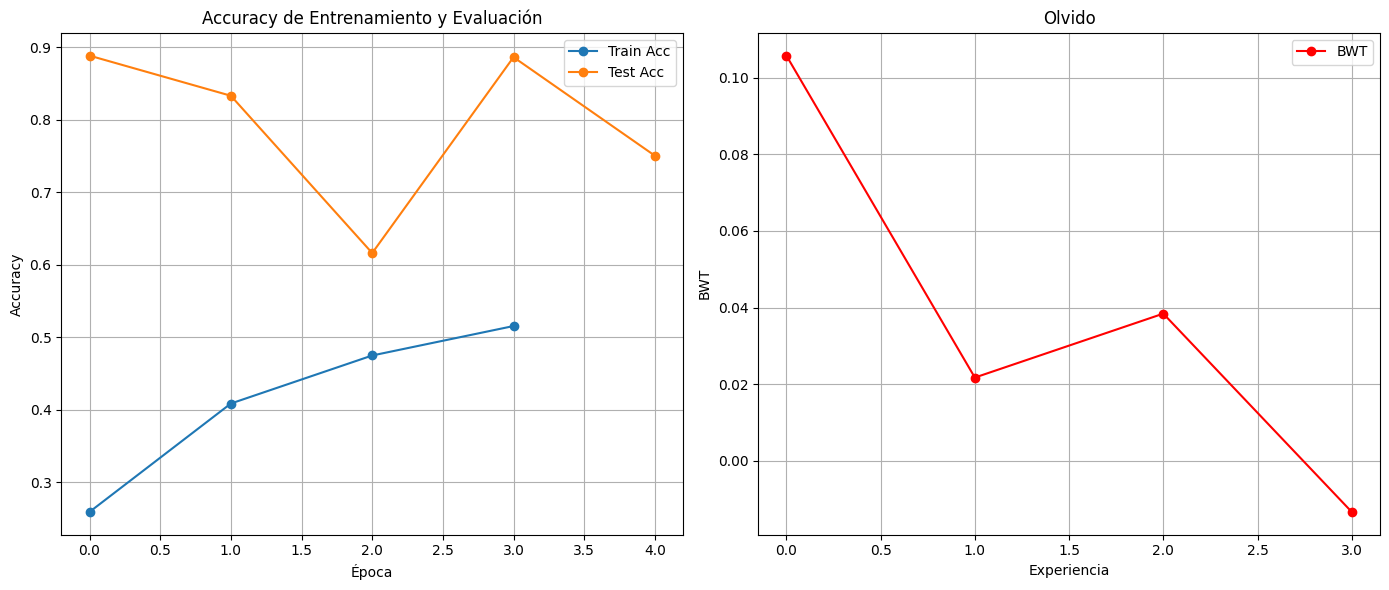

In [ ]:
epochs = [0, 1, 2, 3]
experiences = [0, 1, 2, 3, 4]


train_accuracies = [
    0.2592,
    0.4086,
    0.4748,
    0.5154
]

eval_accuracies = [
    0.8881,
    0.8328,
    0.6160,
    0.8860,
    0.7502
]

forgetting = [
    0.1058,
    0.0217,
    0.0384,
    -0.0134,
]

#Accuracy de entrenamiento y evaluación
plt.figure(figsize=(14, 6))

#Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracies, label='Train Acc', marker='o')
plt.plot(experiences, eval_accuracies, label='Test Acc', marker='o')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.title('Accuracy de Entrenamiento y Evaluación')
plt.legend()
plt.grid()

#Olvido
plt.subplot(1, 2, 2)
plt.plot(experiences[:-1], forgetting, label='BWT', marker='o', color='red')
plt.xlabel('Experiencia')
plt.ylabel('BWT')
plt.title('Olvido')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
"""benchmark = SplitCIFAR10(n_experiences=5, return_task_id=False)

# Cargar modelo preentrenado SqueezeNet
class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        # Usar SqueezeNet preentrenado en ImageNet
        squeezenet = models.squeezenet1_1(pretrained=True)
        self.features = squeezenet.features
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))  # Pooling para convertir las características en un vector

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = torch.flatten(x, 1)  # Aplanar las características para el clasificador
        return x

# Clasificador ajustado para CIFAR-10 (10 clases)
class Classifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Classifier, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.fc(x)

# Instanciar el extractor de características (SqueezeNet) y el clasificador
feature_extractor = FeatureExtractor()
classifier = Classifier(input_size=512, num_classes=benchmark.n_classes)  # SqueezeNet genera 512 características

# Configurar el optimizador
optimizer = SGD(
    list(feature_extractor.parameters()) + list(classifier.parameters()),
    lr=2e-2, momentum=0.9, weight_decay=1e-5
)

# Logger interactivo para ver el progreso
interactive_logger = InteractiveLogger()

# Configurar métricas de evaluación
evaluation_plugin = EvaluationPlugin(
    accuracy_metrics(minibatch=True, epoch=True, experience=True, stream=True),
    forgetting_metrics(experience=True, stream=True),
    loggers=[interactive_logger]
)

# Estrategia de entrenamiento iCaRL
cl_strategy = ICaRL(
    feature_extractor=feature_extractor,
    classifier=classifier,
    optimizer=optimizer,
    memory_size=4000,  # Tamaño de la memoria de ejemplares antiguos
    buffer_transform=transforms.Compose([  # Transformaciones de imagen para el buffer
        transforms.RandomHorizontalFlip(),
        transforms.RandomCrop(32, padding=4),
        transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
        #transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]),
    fixed_memory=True,  # Memoria fija
    train_mb_size=128,
    train_epochs=10,
    eval_mb_size=128,
    evaluator=evaluation_plugin
)

# Entrenamiento y evaluación en las experiencias de SplitCIFAR10
for experience in benchmark.train_stream:
    print(f"Entrenando en la experiencia {experience.current_experience}")
    cl_strategy.train(experience)
    print("Evaluando en el conjunto de prueba:")
    cl_strategy.eval(benchmark.test_stream)"""

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_1_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_1_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Entrenando en la experiencia 0
-- >> Start of training phase << --
100%|██████████| 79/79 [00:14<00:00,  5.61it/s]
Epoch 0 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.5011
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.4375
100%|██████████| 79/79 [00:13<00:00,  5.79it/s]
Epoch 1 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.5193
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.6250
100%|██████████| 79/79 [00:15<00:00,  5.16it/s]
Epoch 2 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.5607
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.6250
100%|██████████| 79/79 [00:13<00:00,  5.88it/s]
Epoch 3 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.7239
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.8125
100%|██████████| 79/79 [00:13<00:00,  5.80it/s]
Epoch 4 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8675
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.9375
100%|██████████| 79/79 [00:13<00:00,  5.81it/s]
Epoch

In [ ]:
benchmark = SplitCIFAR10(n_experiences=5, return_task_id=False)

class FeatureExtractor(nn.Module):
    def __init__(self):
        super(FeatureExtractor, self).__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten()
        )

    def forward(self, x):
        return self.cnn(x)

class Classifier(nn.Module):
    def __init__(self, input_size, num_classes):
        super(Classifier, self).__init__()
        self.fc = nn.Linear(input_size, num_classes)

    def forward(self, x):
        return self.fc(x)

feature_extractor = FeatureExtractor()
classifier = Classifier(input_size=64*8*8, num_classes=benchmark.n_classes)  #Tamaño de salida del extractor es 64*8*8

optimizer = SGD(
    list(feature_extractor.parameters()) + list(classifier.parameters()),
    lr=2e-2, momentum=0.9, weight_decay=1e-5
)

interactive_logger = InteractiveLogger()
evaluation_plugin = EvaluationPlugin(
    accuracy_metrics(minibatch=True, epoch=True, experience=True, stream=True),
    forgetting_metrics(experience=True, stream=True),
    loggers=[interactive_logger]
)

#Transformación para el buffer de memoria
buffer_transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.Lambda(lambda x: x)
])

cl_strategy = ICaRL(
    feature_extractor=feature_extractor,
    classifier=classifier,
    optimizer=optimizer,
    memory_size=2000,  #Tamaño de la memoria para almacenar ejemplos de clases antiguas
    buffer_transform=buffer_transform,
    fixed_memory=True,
    train_mb_size=128,
    train_epochs=4,
    eval_mb_size=128,
    evaluator=evaluation_plugin
)

for experience in benchmark.train_stream:
    print(f"Entrenando en la experiencia {experience.current_experience}")
    cl_strategy.train(experience)
    print("Evaluando en el conjunto de prueba:")
    cl_strategy.eval(benchmark.test_stream)

Files already downloaded and verified
Files already downloaded and verified
Entrenando en la experiencia 0
-- >> Start of training phase << --
100%|██████████| 79/79 [00:22<00:00,  3.58it/s]
Epoch 0 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.6332
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.7500
100%|██████████| 79/79 [00:21<00:00,  3.75it/s]
Epoch 1 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.7105
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.6250
100%|██████████| 79/79 [00:21<00:00,  3.59it/s]
Epoch 2 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.7595
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.6250
100%|██████████| 79/79 [00:20<00:00,  3.84it/s]
Epoch 3 ended.
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.7750
	Top1_Acc_MB/train_phase/train_stream/Task000 = 0.9375
-- >> End of training phase << --
Evaluando en el conjunto de prueba:
-- >> Start of eval phase << --
-- Starting eval on experience 0 (Task 0) from test

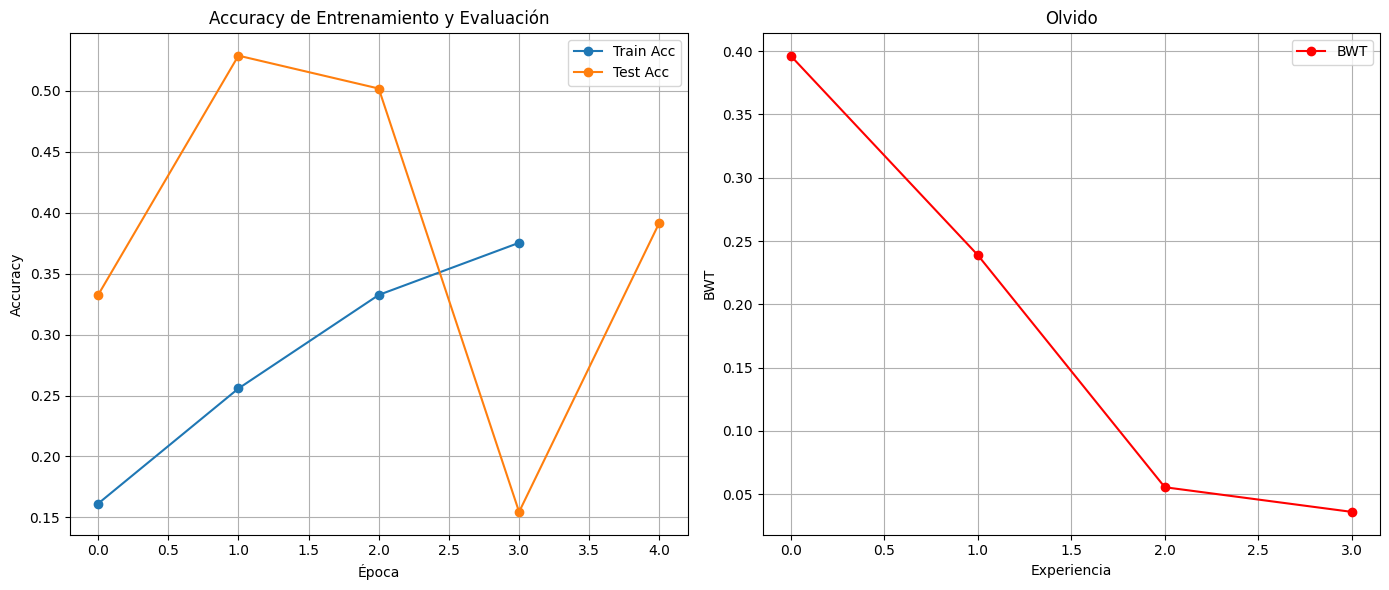

In [ ]:
epochs = [0, 1, 2, 3]
experiences = [0, 1, 2, 3, 4]

train_accuracies = [
    0.1613,
    0.2558,
    0.3326,
    0.3754
]

eval_accuracies = [
    0.3325,
    0.5290,
    0.5020,
    0.1545,
    0.3920
]

forgetting = [
    0.3965,
    0.2390,
    0.0555,
    0.0360,
]

#Accuracy de entrenamiento y evaluación
plt.figure(figsize=(14, 6))

#Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracies, label='Train Acc', marker='o')
plt.plot(experiences, eval_accuracies, label='Test Acc', marker='o')
plt.xlabel('Época')
plt.ylabel('Accuracy')
plt.title('Accuracy de Entrenamiento y Evaluación')
plt.legend()
plt.grid()

#Olvido
plt.subplot(1, 2, 2)
plt.plot(experiences[:-1], forgetting, label='BWT', marker='o', color='red')
plt.xlabel('Experiencia')
plt.ylabel('BWT')
plt.title('Olvido')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()